In [1]:
import tensorflow as tf
import keras_preprocessing
print(tf.__version__)
print(keras_preprocessing.__version__)

2024-10-28 17:10:17.238606: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 17:10:17.243677: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 17:10:17.260111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 17:10:17.286746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 17:10:17.294759: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 17:10:17.314775: I tensorflow/core/platform/cpu_feature_gu

2.17.0
1.1.2


In [2]:
import tensorflow as tf

# Verificar se a GPU está disponível
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Criar um tensor simples
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
    b = tf.constant([[1.0, 1.0], [0.0, 1.0]])
    c = tf.matmul(a, b)

print(c)


Num GPUs Available:  0
tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


I0000 00:00:1730146220.065248  100299 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-28 17:10:20.065963: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:

import tensorflow as tf
import keras_preprocessing
from tensorflow.keras.preprocessing.image import load_img
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
tf.config.run_functions_eagerly(True)



In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


VALID_DIR = 'fusionValidate2/'
TRAIN_DIR = 'fusion2/'

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(225, 150), class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(225, 150), class_mode='categorical')

model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(225, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()



Found 2938 images belonging to 5 classes.
Found 385 images belonging to 5 classes.


/home/bernardo/Documentos/github/IA-Deeplearning-proj/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 74, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 72, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 7, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,505,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,768,261 (22.00 MB)

 Trainable params: 5,768,261 (22.00 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compilar o modelo

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)

# Callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=7)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("checkpointsavebest.keras", save_best_only=True)
checkpoint_accuracy = tf.keras.callbacks.ModelCheckpoint('checkpoint_val_accuracy.keras', save_best_only=True, monitor='val_accuracy', mode='max')



# Calcular steps_per_epoch e validation_steps
batch_size = 41

import math
steps_per_epoch = math.ceil(train_generator.samples / batch_size)
validation_steps = math.ceil(validation_generator.samples / batch_size)


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("nome da gpu", tf.test.gpu_device_name())
print(tf.test.is_gpu_available())
print("steps_per_epoch", steps_per_epoch)
print("validation_steps", validation_steps)

print(TRAIN_DIR, VALID_DIR)
# Verificar se os generators têm pelo menos um lote de dados
if train_generator is not None and validation_generator is not None:
    if len(train_generator) > 0 and len(validation_generator) > 0:
        # forçar a execução na gpu
        history = model.fit(
            train_generator,
            epochs=41,
            steps_per_epoch=steps_per_epoch,
            validation_data=validation_generator,
            validation_steps=validation_steps,
            callbacks=[early_stopping_cb,checkpoint_cb,checkpoint_accuracy],
            verbose=1
        )
    else:
        print("Error: The generators do not have any data.")
else:
    print("Error: One of the generators is None.")


Num GPUs Available:  0
nome da gpu 
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
steps_per_epoch 72
validation_steps 10
fusion2/ fusionValidate2/


I0000 00:00:1730146221.312584  100299 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-28 17:10:21.313105: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I0000 00:00:1730146221.440260  100299 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-1

Epoch 1/41


/home/bernardo/Documentos/github/IA-Deeplearning-proj/venv/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


72/72 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.3159 - loss: 1.4354 - val_accuracy: 0.3125 - val_loss: 1.4246
Epoch 2/41
20/72 ━━━━━━━━━━━━━━━━━━━━ 1:05 1s/step - accuracy: 0.3418 - loss: 1.2500

2024-10-28 17:12:30.119217: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/linuxbrew/.linuxbrew/opt/python@3.9/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-28 17:12:30.838792: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 355ms/step - accuracy: 0.3443 - loss: 1.2755 - val_accuracy: 0.4615 - val_loss: 1.2443
Epoch 3/41
72/72 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4151 - loss: 1.2619 - val_accuracy: 0.2844 - val_loss: 1.3780
Epoch 4/41
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 350ms/step - accuracy: 0.4992 - loss: 1.0706 - val_accuracy: 0.4615 - val_loss: 1.3312
Epoch 5/41


2024-10-28 17:14:36.275485: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


 9/72 ━━━━━━━━━━━━━━━━━━━━ 1:21 1s/step - accuracy: 0.4909 - loss: 1.1624

KeyboardInterrupt: 

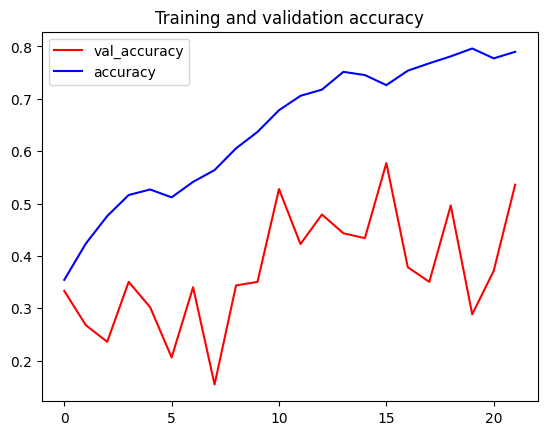

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, val_acc, 'r', label='val_accuracy')
plt.plot(epochs, acc, 'b', label='accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

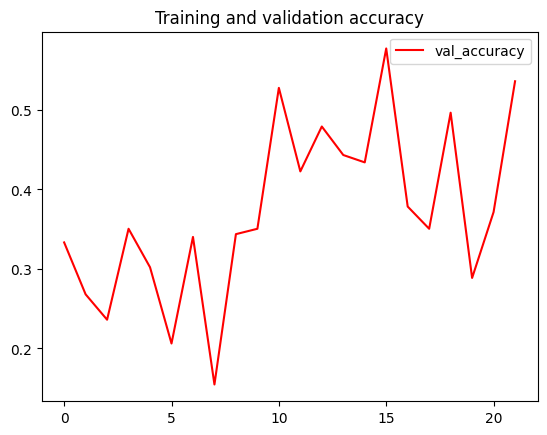

In [7]:
plt.plot(val_acc, 'r', label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [9]:
! pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
altair                       5.4.1
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.8.2
cachetools                   5.5.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
click                        8.1.7
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.7
decorator                    5.1.1
defusedxml                   0.7.1
exceptiongroup             